# Loading the Dataset


In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
# X = adult.data.features
# y = adult.data.targets

adult_dataset_original = adult.data.original
# print(adult_dataset.shape)

# df = pd.read_csv('adult.data')
# print(df.shape)

# metadata and variable info
print(adult.metadata, '/n/n/n')
print(adult.variables)

# Concatenating the features and target along columns (axis=1)
# adult_data = pd.concat([X, y], axis=1)
# print(adultData)

#checking whether both datasets are the same or not.
# import pandas.testing as pd_testing
# try:
#     pd_testing.assert_frame_equal(df, adult_dataset)
#     print("Datasets are identical.")
# except AssertionError as e:
#     print("Datasets are different:", e)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# Exploratory Data Analysis

## Overall Dataset

In [3]:
# view the head and the tail of dataset

# from IPython.display import display
# display(adult_dataset.head())
# display(adult_dataset.tail())
# display(adult_dataset)

adult_dataset_original

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
#columns | non-Null count | Dtype
# display(adult_dataset.info())
adult_dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
# viewing the columns names which contain NaN / None as values
# checks along the column axis (axis = 0)
# True if contains Nan / None
# print(adult_dataset_original.isnull().any())

print("Dataset columns  with null values : \n", adult_dataset_original.columns[adult_dataset_original.isnull().any()])

print("\nNo of null values under each feature variable : ")
print(adult_dataset_original.isnull().sum())

print("\nTotal No of null values in the dataset : ")
adult_dataset_original.isnull().sum().sum()

Dataset columns  with null values : 
 Index(['workclass', 'occupation', 'native-country'], dtype='object')

No of null values under each feature variable : 
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

Total No of null values in the dataset : 


2203

## Handling the 'fnlwgt' - final weight column

In [6]:
'''fnlwgt column (final weight) : this represents the weight assigned to each individual in the survey data.
This weight indicates the number of people in the population that each record represents.
It is used to adjust for oversampling or undersampling of particular groups during the survey process.
Therefore it is typically not a feature that directly relates to the target variable.'''
adult_dataset_original["fnlwgt"].unique()

array([ 77516,  83311, 215646, ..., 173449,  89686, 350977])

In [7]:
preprocessing_adult_dataset = adult_dataset_original.copy()

In [8]:
# dropping the column 'fnlwgt'
preprocessing_adult_dataset.drop('fnlwgt', axis = 1, inplace = True) #inplace does the changes to the existing df
preprocessing_adult_dataset # this contains the dataset without the 'fnlwgt' column
# preprocessing_adult_dataset.shape

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Handilng the Target variable - "Income" values

In [9]:
# Setting the 'Income' values to 2 vlaues (>50K, <=50K.)  as shown in the Adult UCIMLRepo.
print("Before replacing  :  ")
print(preprocessing_adult_dataset['income'].value_counts())

print("\n\nAfter replacing :  ")
preprocessing_adult_dataset['income'].replace('<=50K', '<=50K.', inplace=True)
preprocessing_adult_dataset['income'].replace('>50K.', '>50K', inplace=True)
print(preprocessing_adult_dataset['income'].value_counts())

Before replacing  :  
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64


After replacing :  
<=50K.    37155
>50K      11687
Name: income, dtype: int64


## 'age' Column Analysis

Statistical analysis of 'age' column:
 count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64 




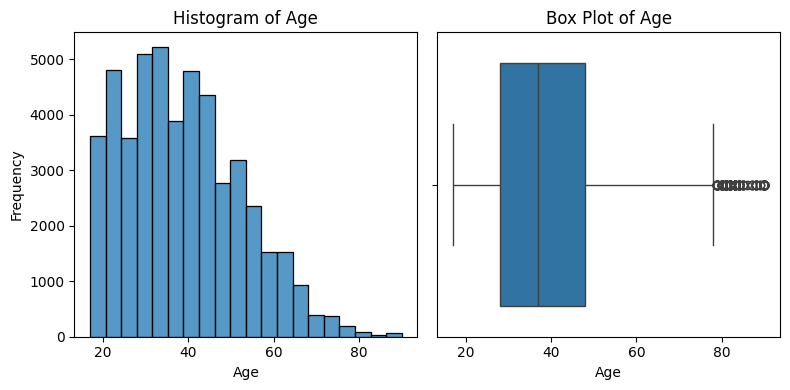

In [10]:
# preprocessing_adult_dataset['age'].unique()
stat_age_before_preprocess = preprocessing_adult_dataset['age'].describe()
print("Statistical analysis of 'age' column:\n", stat_age_before_preprocess, '\n\n')

# plotting the age column values to check for potential outliers
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(preprocessing_adult_dataset['age'], bins=20, ax = axes[0])
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(data = preprocessing_adult_dataset, x='age', ax=axes[1])
axes[1].set_title('Box Plot of Age')
axes[1].set_xlabel('Age')

# Violin Plot
# sns.violinplot(data = preprocessing_adult_dataset, x='age', ax=axes[2])
# axes[2].set_title('Violin Plot of Age')
# axes[2].set_xlabel('Age')

plt.tight_layout()
plt.show()

In [11]:
'''age distribution is positively skewed. These outliers are potentilly not data entry errors,
Therefore we can handle these outliers in either following way,
1) Data Transformation - if df is skewed can apply transformation such as logrithm or sqroot to make distribution more symetrical.
2) Triming - If the outliers are relatively few and clearly identifiable, trim df(removing a certain percentage of the highest and/or lowest values).
3) Winsorization - similar to trimming but instead of removing extreme values,replaced with the nearest non-outlier value. This method retains the same number of data points but reduces the impact of outliers.
4) Capping - setting a threshold beyond which values are considered as outliers and replacing them with the nearest threshold value. Capping can be more aggressive than trimming and may lead to loss of information.
The other methods like model-based , ensemble might make the pre-process to complicated.'''


'age distribution is positively skewed. These outliers are potentilly not data entry errors,\nTherefore we can handle these outliers in either following way,\n1) Data Transformation - if df is skewed can apply transformation such as logrithm or sqroot to make distribution more symetrical.\n2) Triming - If the outliers are relatively few and clearly identifiable, trim df(removing a certain percentage of the highest and/or lowest values).\n3) Winsorization - similar to trimming but instead of removing extreme values,replaced with the nearest non-outlier value. This method retains the same number of data points but reduces the impact of outliers.\n4) Capping - setting a threshold beyond which values are considered as outliers and replacing them with the nearest threshold value. Capping can be more aggressive than trimming and may lead to loss of information.\nThe other methods like model-based , ensemble might make the pre-process to complicated.'

### LOGRITHMIC TRANSFORMATION TO AGE COLUMN


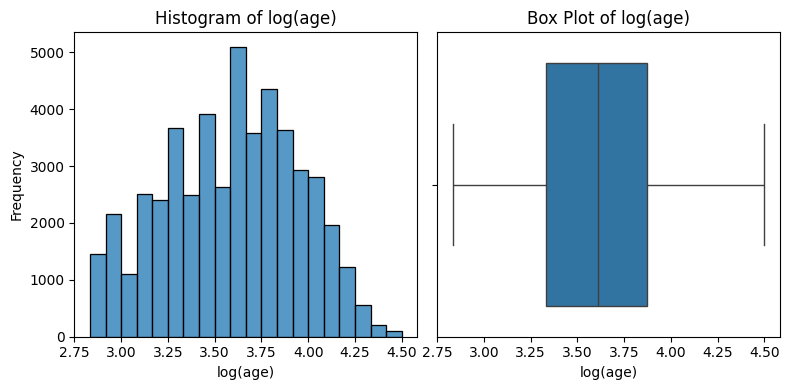

In [12]:
# Apply logarithmic transformation to handle outliers
adult_dataset_trfm_age = preprocessing_adult_dataset.copy()
adult_dataset_trfm_age['log(age)'] = np.log(preprocessing_adult_dataset['age'])
adult_dataset_trfm_age = adult_dataset_trfm_age.drop('age', axis = 1)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(adult_dataset_trfm_age['log(age)'], bins=20, ax = axes[0])
axes[0].set_title('Histogram of log(age)')
axes[0].set_xlabel('log(age)')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(data = adult_dataset_trfm_age, x='log(age)', ax=axes[1])
axes[1].set_title('Box Plot of log(age)')
axes[1].set_xlabel('log(age)')

plt.tight_layout()
plt.show()

# print(len(adult_dataset_trfm_age['log(age)'].unique()))
# print(len(adult_dataset['age'].unique()))

### TRIMMING THE DATASET TO REMOVE OUTLIERS




In [13]:
# Calculate the interquartile range (IQR) for the age column
Q1 = preprocessing_adult_dataset['age'].quantile(0.25)
Q3 = preprocessing_adult_dataset['age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of data points detected as outliers
num_outliers = ((preprocessing_adult_dataset['age'] < lower_bound) | (preprocessing_adult_dataset['age'] > upper_bound)).sum()
print("Number of outliers in the age column:", num_outliers)
print("\nOutliers as a percentage : ",num_outliers*100/preprocessing_adult_dataset.shape[0], "%")

Number of outliers in the age column: 216

Outliers as a percentage :  0.4422423324188199 %


In [14]:
""""Since the dataset contains only a small percentage of outliers it can be removed
limiting the age values to be within the lowerbound and upperbound"""

# Trim the extreme values from the age column
preprocessing_adult_dataset = preprocessing_adult_dataset[(preprocessing_adult_dataset['age'] >= lower_bound) & (preprocessing_adult_dataset['age'] <= upper_bound)]

# fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# # Histogram
# sns.histplot(adult_dataset_trim['age'], bins=20, ax = axes[0])
# axes[0].set_title('Histogram of Age')
# axes[0].set_xlabel('Age')
# axes[0].set_ylabel('Frequency')

# # Box Plot
# sns.boxplot(data = adult_dataset_trim, x='age', ax=axes[1])
# axes[1].set_title('Box Plot of Age')
# axes[1].set_xlabel('Age')
"""if  once again the boxplot is displayed for the trimmed dataset it takes its values as the new dataset
and might shoow some values which were not considered as extreme before as extreme."""
# plt.tight_layout()
# plt.show()

# dataset shape after removing outliers (trimming)
preprocessing_adult_dataset.shape

(48626, 14)

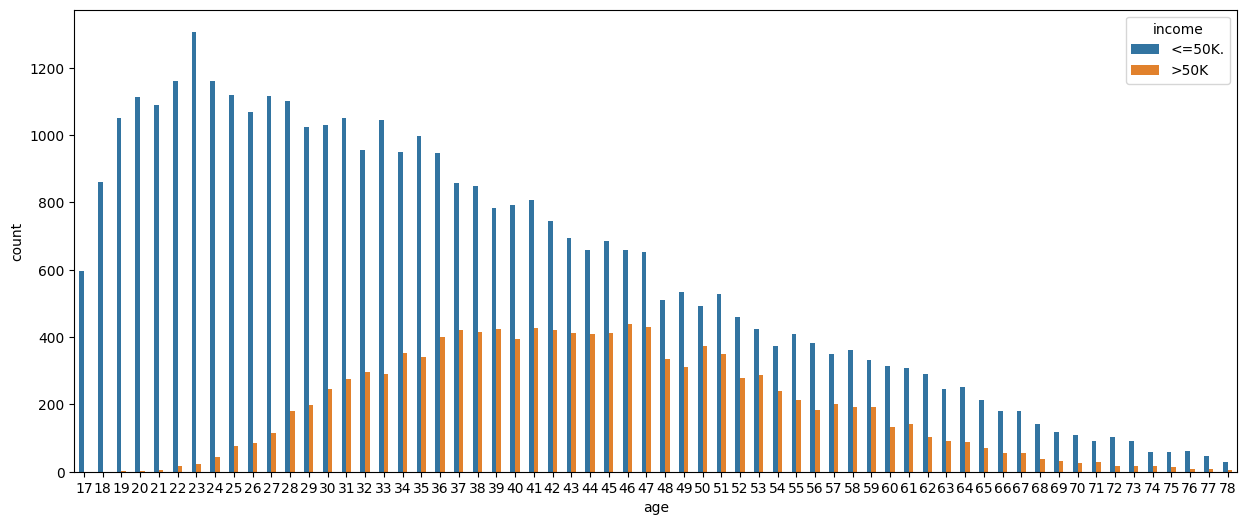

count    48626.000000
mean        38.443631
std         13.404926
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         78.000000
Name: age, dtype: float64

In [15]:
plt.figure(figsize=(15, 6))
sns.countplot(x='age', hue='income', data=preprocessing_adult_dataset, width=0.5)
plt.show()

#statistical Analysis of 'age' column after trimming
preprocessing_adult_dataset['age'].describe()

## 'education' & 'education-num' Column Analysis




In [16]:
"""'education' column contains the education level of the adult as in a categorical variable (16 values)and
the 'education-num' is the respective numerical value of the  'education' of the adult."""

# print(len(adult_dataset['education'].unique()))
# print(len(adult_dataset['education-num'].unique()))
preprocessing_adult_dataset['education'].value_counts()

HS-grad         15715
Some-college    10853
Bachelors        8000
Masters          2644
Assoc-voc        2055
11th             1806
Assoc-acdm       1596
10th             1381
7th-8th           927
Prof-school       823
9th               754
12th              655
Doctorate         590
5th-6th           504
1st-4th           240
Preschool          83
Name: education, dtype: int64

In [17]:
#droping the 'education' column and keeping 'education-num' column, since both columns are correlated.
preprocessing_adult_dataset.drop(['education'], axis= 1, inplace= True)
preprocessing_adult_dataset

<ipython-input-17-5c2c29666d49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_adult_dataset.drop(['education'], axis= 1, inplace= True)


,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


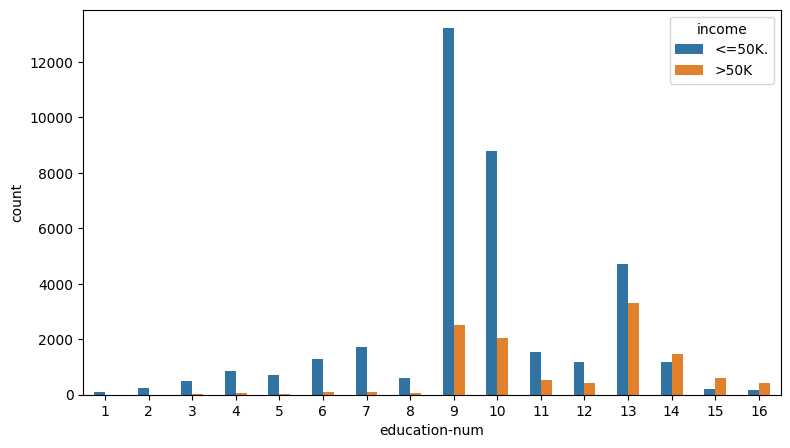

         1    2    3    4    5     6     7    8      9    10    11    12  \
income                                                                     
<=50K.  82  232  477  865  713  1295  1715  608  13219  8792  1534  1186   
>50K     1    8   27   62   41    86    91   47   2496  2061   521   410   

          13    14   15   16  
income                        
<=50K.  4695  1190  213  161  
>50K    3305  1454  610  429  


In [18]:
plt.figure(figsize=(9, 5))  # Adjust the width and height as needed
sns.countplot(x='education-num', hue='income', data=preprocessing_adult_dataset, width=0.5)  # Adjust the width value
plt.show()

# Group the data by 'education-num' and 'income' and count the occurrences
counts_table = preprocessing_adult_dataset.groupby(['income','education-num']).size().unstack(fill_value=0)

# Rename the columns for better readability
counts_table.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16']

# Print the counts table
print(counts_table)

## 'capital-gain' Column Analysis

In [19]:
print(preprocessing_adult_dataset['capital-gain'].unique())
preprocessing_adult_dataset['capital-gain'].value_counts()

[ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2354  5455 15020  1424  3273 22040  4416
  3908 10566  4931  1086  7430  6497   114  7896  2346  3418  3432  2907
  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848  3887  5721
  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797  1173  4687
  6723  2009  6097  2653   991  1639  2062 18481  7978  2387  5060  7262
  1731  1264  6612]


0        44623
15024      513
7688       410
7298       364
99999      243
         ...  
18481        1
1639         1
1111         1
22040        1
6612         1
Name: capital-gain, Length: 123, dtype: int64

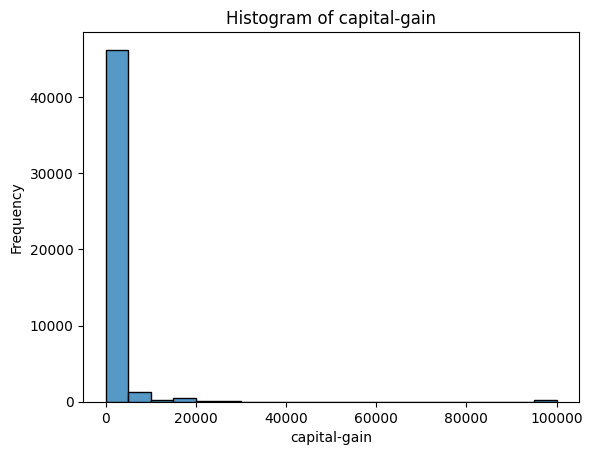

In [20]:
# Histogram
sns.histplot(preprocessing_adult_dataset['capital-gain'], bins=20)
plt.title('Histogram of capital-gain')
plt.xlabel('capital-gain')
plt.ylabel('Frequency')
plt.show()

# Box Plot
# sns.boxplot(preprocessing_adult_dataset['capital-gain'], orient='h')
# plt.title('Histogram of capital-gain')
# plt.xlabel('capital-gain')
# plt.ylabel('Frequency')
# plt.show()


# plt.figure(figsize=(15, 6))
# sns.countplot(x='income', hue='capital-gain', data=preprocessing_adult_dataset, width=0.5)
# plt.show()


### standardization of 'capital-gain'

In [21]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler to the 'capital-gain' column and transform it
preprocessing_adult_dataset['capital-gain_scaled'] = scaler.fit_transform(preprocessing_adult_dataset[['capital-gain']])

# Drop the 'capital-gain' column
preprocessing_adult_dataset.drop(columns=['capital-gain'], inplace=True)

print(preprocessing_adult_dataset['capital-gain_scaled'].head())
# preprocessing_adult_dataset['capital-gain_scaled'].value_counts()

0    0.147304
1   -0.144495
2   -0.144495
3   -0.144495
4   -0.144495
Name: capital-gain_scaled, dtype: float64


<ipython-input-21-f85d9942e92f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_adult_dataset['capital-gain_scaled'] = scaler.fit_transform(preprocessing_adult_dataset[['capital-gain']])
<ipython-input-21-f85d9942e92f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessing_adult_dataset.drop(columns=['capital-gain'], inplace=True)


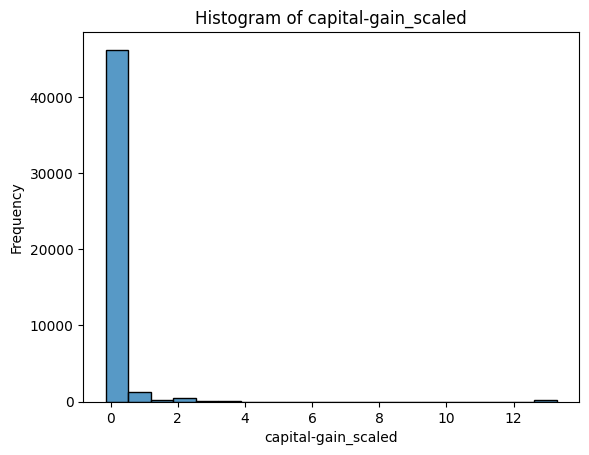

In [22]:
# Histogram
sns.histplot(preprocessing_adult_dataset['capital-gain_scaled'], bins=20)
plt.title('Histogram of capital-gain_scaled')
plt.xlabel('capital-gain_scaled')
plt.ylabel('Frequency')
plt.show()

# Box Plot
# sns.boxplot(preprocessing_adult_dataset['capital-gain_scaled'], orient='h')
# plt.title('Histogram of capital-gain_scaled')
# plt.xlabel('capital-gain_scaled')
# plt.ylabel('Frequency')
# plt.show()


# plt.figure(figsize=(15, 6))
# sns.countplot(x='income', hue='capital-gain_scaled', data=preprocessing_adult_dataset, width=0.5)
# plt.show()

## 'capital-loss' Column Analysis

In [26]:
print(preprocessing_adult_dataset['capital-loss'].unique())
print('\n\n',preprocessing_adult_dataset['capital-loss'].value_counts())

[   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653 2392
 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547 2174
 2206 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155 3900
 2201 1944 2467 2163 2754 2472 4356 1411 1429 3175 1510 1870 1911 2465
 1421]


 0       46355
1902      304
1977      253
1887      233
2415       72
        ...  
1539        1
1870        1
1911        1
2465        1
1421        1
Name: capital-loss, Length: 99, dtype: int64


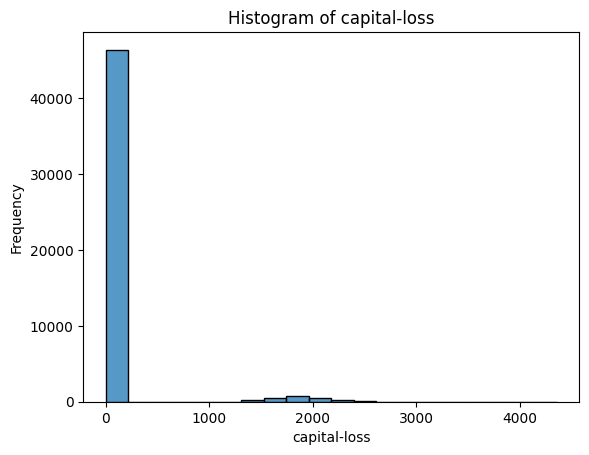

In [24]:
# Histogram
sns.histplot(preprocessing_adult_dataset['capital-loss'], bins=20)
plt.title('Histogram of capital-loss')
plt.xlabel('capital-loss')
plt.ylabel('Frequency')
plt.show()

In [28]:
# # Calculate Pearson correlation coefficient between the 'income' and 'capital-loss'
# correlation = preprocessing_adult_dataset['income'].corr(preprocessing_adult_dataset['capital-loss'])

# # Print the correlation coefficient
# print("Correlation coefficient:", correlation)

from scipy.stats import pointbiserialr

# Assuming 'binary_variable' is a binary variable and 'continuous_variable' is a continuous variable
# Compute point-biserial correlation coefficient
correlation_coefficient, p_value = pointbiserialr(preprocessing_adult_dataset['income'], preprocessing_adult_dataset['capital-loss'])

print("Point-biserial correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

## 'workclass' Column Analysis

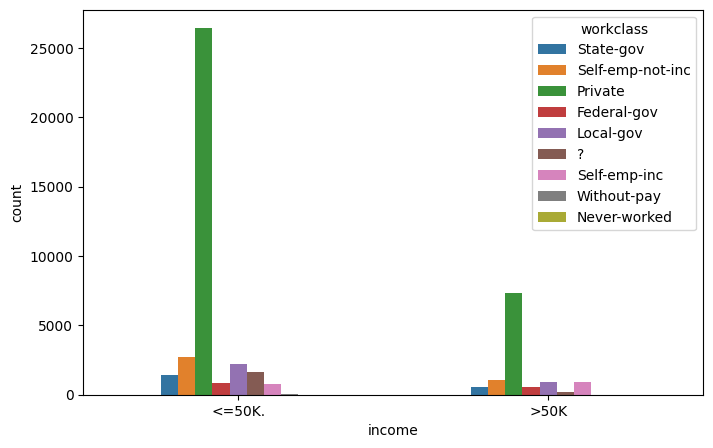

Private             33810
Self-emp-not-inc     3824
Local-gov            3123
State-gov            1980
?                    1801
Self-emp-inc         1679
Federal-gov          1429
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [ ]:
plt.figure(figsize=(8, 5))  # Adjust the width and height as needed
sns.countplot(x='income', hue='workclass', data=preprocessing_adult_dataset, width=0.5)  # Adjust the width value
plt.show()
preprocessing_adult_dataset['workclass'].value_counts()

## 'hours-per-week' Column Analysis

In [28]:
def draw_distplot(column, title = ""):

    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

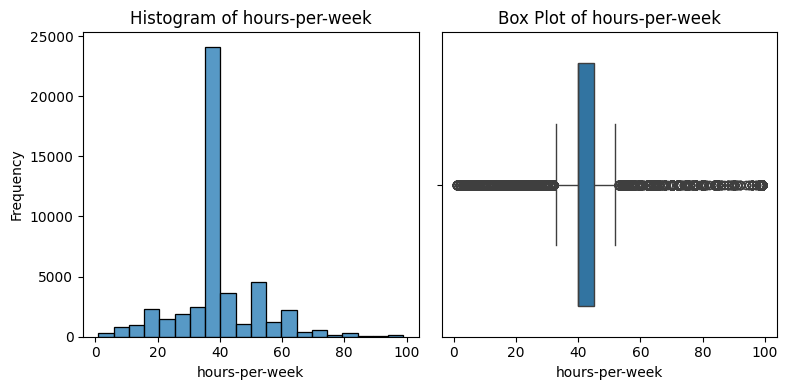

<ipython-input-28-b64fe70498fc>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


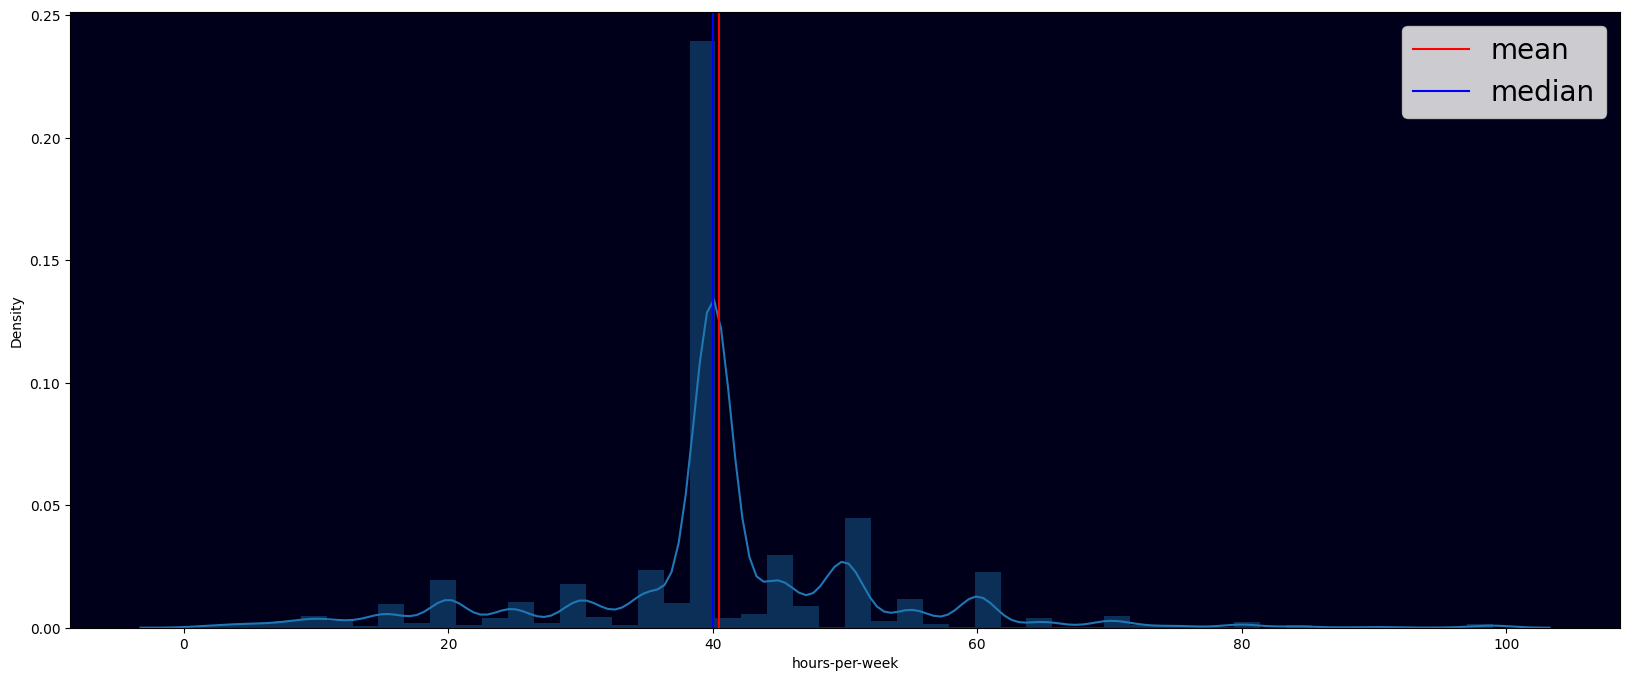

In [29]:
preprocessing_adult_dataset['hours-per-week'].unique()
preprocessing_adult_dataset['hours-per-week'].describe()
# preprocessing_adult_dataset['hours-per-week'].value_counts().tail(10)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(preprocessing_adult_dataset['hours-per-week'], bins=20, ax = axes[0])
axes[0].set_title('Histogram of hours-per-week')
axes[0].set_xlabel('hours-per-week')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(data = preprocessing_adult_dataset, x='hours-per-week', ax=axes[1])
axes[1].set_title('Box Plot of hours-per-week')
axes[1].set_xlabel('hours-per-week')

plt.tight_layout()
plt.show()


draw_distplot(column = preprocessing_adult_dataset['hours-per-week'])


In [30]:
# Calculate the interquartile range (IQR) for the age column
Q1 = preprocessing_adult_dataset['hours-per-week'].quantile(0.25)
Q3 = preprocessing_adult_dataset['hours-per-week'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR

# Count the number of data points detected as outliers
num_outliers = ((preprocessing_adult_dataset['hours-per-week'] < lower_bound) | (preprocessing_adult_dataset['hours-per-week'] > upper_bound)).sum()
print("Number of outliers in the age column:", num_outliers)
print("\nOutliers as a percentage : ",num_outliers*100/preprocessing_adult_dataset.shape[0], "%")

32.5
Number of outliers in the age column: 13360

Outliers as a percentage :  27.47501336733435 %


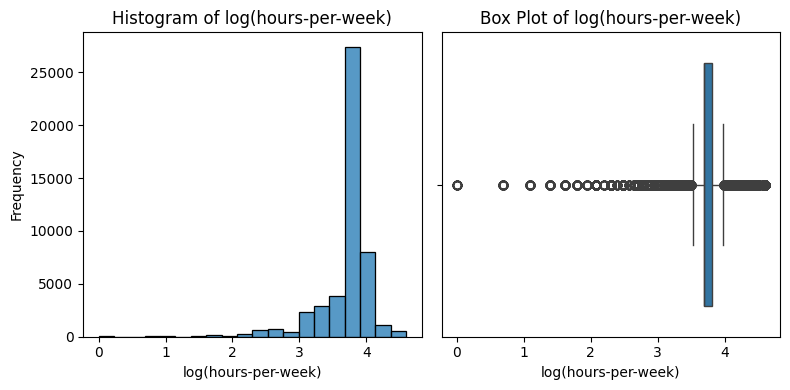

In [31]:
#Since the no.of outliers are relatively higher, cannot remove those. Therefore considered transforming them into log values
# Apply logarithmic transformation to handle outliers
adult_dataset_trfm = preprocessing_adult_dataset.copy()
adult_dataset_trfm['log(hours-per-week)'] = np.log(preprocessing_adult_dataset['hours-per-week'])
adult_dataset_trfm = adult_dataset_trfm.drop('hours-per-week', axis = 1)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Histogram
sns.histplot(adult_dataset_trfm['log(hours-per-week)'], bins=20, ax = axes[0])
axes[0].set_title('Histogram of log(hours-per-week)')
axes[0].set_xlabel('log(hours-per-week)')
axes[0].set_ylabel('Frequency')

# Box Plot
sns.boxplot(data = adult_dataset_trfm, x='log(hours-per-week)', ax=axes[1])
axes[1].set_title('Box Plot of log(hours-per-week)')
axes[1].set_xlabel('log(hours-per-week)')

plt.tight_layout()
plt.show()

# print(len(adult_dataset_trfm_age['log(age)'].unique()))
# print(len(adult_dataset['age'].unique()))

In [32]:
#Remaining outliers
# Calculate the interquartile range (IQR) for the age column
Q1 = adult_dataset_trfm['log(hours-per-week)'].quantile(0.25)
Q3 = adult_dataset_trfm['log(hours-per-week)'].quantile(0.75)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR

# Count the number of data points detected as outliers
num_outliers = ((adult_dataset_trfm['log(hours-per-week)'] < lower_bound) | (adult_dataset_trfm['log(hours-per-week)'] > upper_bound)).sum()
print("Number of outliers in the age column:", num_outliers)
print("\nOutliers as a percentage : ",num_outliers*100/preprocessing_adult_dataset.shape[0], "%")

3.512204900629361
Number of outliers in the age column: 13381

Outliers as a percentage :  27.518200139842882 %


In [33]:
preprocessing_adult_dataset.shape[0]
adult_dataset_trfm

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income,log(hours-per-week)
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,<=50K.,3.688879
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K.,2.564949
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K.,3.688879
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K.,3.688879
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K.,3.688879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,United-States,<=50K.,3.583519
48838,64,NaN,9,Widowed,NaN,Other-relative,Black,Male,0,0,United-States,<=50K.,3.688879
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,United-States,<=50K.,3.912023
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,United-States,<=50K.,3.688879


## 'sex' Column Analysis

In [34]:
preprocessing_adult_dataset['sex'].value_counts()

Male      32498
Female    16128
Name: sex, dtype: int64

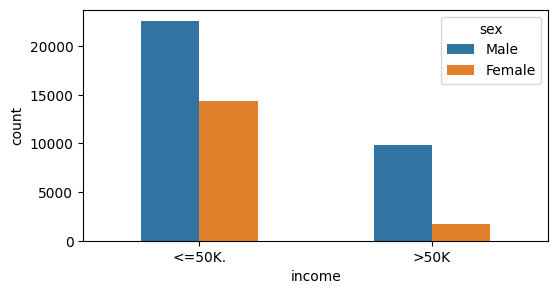

In [35]:
plt.figure(figsize=(6, 3))
sns.countplot(x='income', hue='sex', data=preprocessing_adult_dataset, width=0.5)
plt.show()

## 'relationship' and 'marital-status' Column Analysis


In [36]:
preprocessing_adult_dataset['marital-status'].value_counts()

Married-civ-spouse       22281
Never-married            16086
Divorced                  6622
Separated                 1527
Widowed                   1450
Married-spouse-absent      623
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [37]:
preprocessing_adult_dataset['relationship'].value_counts()

Husband           19623
Not-in-family     12493
Own-child          7572
Unmarried          5109
Wife               2327
Other-relative     1502
Name: relationship, dtype: int64

## 'native-country' Column Analysis


In [38]:
preprocessing_adult_dataset['native-country'].value_counts()

# plt.figure(figsize=(15, 6))
# sns.countplot(x='native-country', hue='income', data=preprocessing_adult_dataset, width=0.5)
# plt.show()

United-States                 43640
Mexico                          950
?                               580
Philippines                     293
Germany                         206
Puerto-Rico                     183
Canada                          180
El-Salvador                     154
India                           151
Cuba                            137
England                         125
China                           122
South                           113
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Vietnam                          86
Columbia                         85
Poland                           84
Haiti                            75
Portugal                         66
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           48
Peru                        

## 'race' Column Analysis


White                 41567
Black                  4674
Asian-Pac-Islander     1511
Amer-Indian-Eskimo      468
Other                   406
Name: race, dtype: int64 




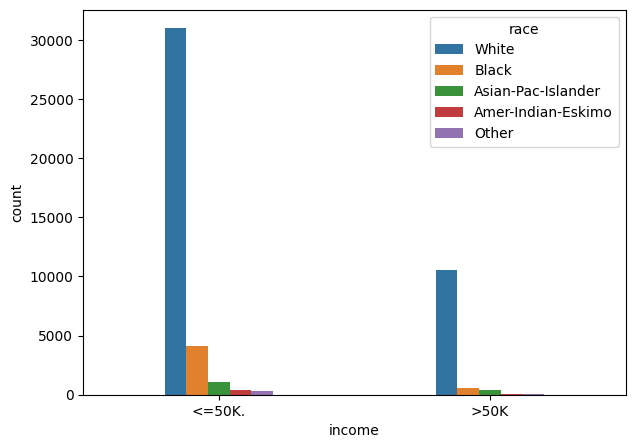

In [39]:
print(preprocessing_adult_dataset['race'].value_counts(), '\n\n')

plt.figure(figsize=(7, 5))
sns.countplot(x='income', hue='race', data=preprocessing_adult_dataset, width=0.4)
plt.show()

## Handling NaN / ? / None values in the dataset



In [50]:
preprocessing_adult_dataset.shape

(48626, 13)

## Encoding Feature values

In [40]:
# from sklearn.preprocessing import OneHotEncoder
# # Initialize the OneHotEncoder
# encoder = OneHotEncoder()

# # Fit and transform the encoder on the specified columns
# encoded_data = encoder.fit_transform(preprocessing_adult_dataset['race'])


In [47]:
dummies = pd.get_dummies(preprocessing_adult_dataset.race)

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
48837,0,0,0,0,1
48838,0,0,1,0,0
48839,0,0,0,0,1
48840,0,1,0,0,0


In [ ]:
merged = pd.concat([preprocessing_adult_dataset, dummies], axis = 'columns')

In [69]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame with categorical columns to be one-hot encoded
# Assuming 'cat_columns' is a list containing the names of categorical columns

cat_columns = ['race','marital-status','native-country','relationship', 'occupation', 'workclass', 'sex']

cat_preprocessing_adult_dataset = preprocessing_adult_dataset[cat_columns]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

# Fit and transform the encoder on the categorical data
encoded_data = encoder.fit_transform(cat_preprocessing_adult_dataset)

# Create a DataFrame with the one-hot encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_columns))

# Reset the index of the original DataFrame
preprocessing_adult_dataset.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
# Make sure to drop the original categorical columns if needed
final_df = pd.concat([preprocessing_adult_dataset.drop(columns=cat_columns), encoded_df], axis=1)

# Display the final DataFrame with one-hot encoded columns
print("Final DataFrame with one-hot encoded columns:")
final_df.info()
# preprocessing_adult_dataset.isnull().sum().sum()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Final DataFrame with one-hot encoded columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48626 entries, 0 to 48625
Data columns (total 88 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48626 non-null  int64  
 1   education-num                              48626 non-null  int64  
 2   capital-gain                               48626 non-null  int64  
 3   capital-loss                               48626 non-null  int64  
 4   hours-per-week                             48626 non-null  int64  
 5   income                                     48626 non-null  object 
 6   race_Asian-Pac-Islander                    48626 non-null  float64
 7   race_Black                                 48626 non-null  float64
 8   race_Other                                 48626 non-null  float64
 9   race_White                                 48626

## Trying out KNN imputer to fill NaN values

In [54]:
from sklearn.impute import KNNImputer
#use one-hot encoding and labelencoding
# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=3)

# Perform KNN imputation
imputed_data = imputer.fit_transform(final_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns = final_df.columns)

# Display the imputed DataFrame
print("Imputed DataFrame:")
imputed_df

Imputed DataFrame:


,race_Asian-Pac-Islander,race_Black,race_Other,race_White,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_nan,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48621,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
48622,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
48623,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48624,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Handle Duplicates


In [102]:
# Display the number of duplicate rows and drop them.
num_of_duplicates = preprocessing_adult_dataset.duplicated().sum()
print("The total number of duplicates found in this dataset is : ", num_of_duplicates)
# adult_df = adult_df.drop_duplicates()

The total number of duplicates found in this dataset is :  6279


# Model Training and Testing

# Data loading

In [70]:
from sklearn.model_selection import train_test_split

y = final_df.income
X = final_df.drop(columns = ['income'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100,
                                 max_depth=50, max_features=10, min_samples_split=30)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

### Evaluation of Random Forest

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)

Accuracy: 0.8631503187332922
Classification Report:
              precision    recall  f1-score   support

      <=50K.       0.89      0.94      0.91      7421
        >50K       0.76      0.61      0.68      2305

    accuracy                           0.86      9726
   macro avg       0.83      0.78      0.80      9726
weighted avg       0.86      0.86      0.86      9726

Confusion Matrix:


array([[6985,  436],
       [ 895, 1410]])

## Naive Bayes

In [75]:
from sklearn.naive_bayes import GaussianNB

# Example: Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

### Evaluation of Naive Bayes

In [76]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8207896360271437
Classification Report:
              precision    recall  f1-score   support

      <=50K.       0.91      0.85      0.88      7421
        >50K       0.60      0.73      0.66      2305

    accuracy                           0.82      9726
   macro avg       0.76      0.79      0.77      9726
weighted avg       0.84      0.82      0.83      9726

Confusion Matrix:
[[6301 1120]
 [ 623 1682]]


gpt code for evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train and evaluate Naive Bayes classifier
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

# Compute evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)
nb_roc_auc = roc_auc_score(y_test, nb_y_pred)

# Train and evaluate Random Forest classifier
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Compute evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred)

# Print evaluation metrics
print("Naive Bayes Evaluation Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)
print("ROC AUC Score:", nb_roc_auc)
print()

print("Random Forest Evaluation Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("ROC AUC Score:", rf_roc_auc)
print()

# Plot ROC curves
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_pred)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)

plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


gpt experimental results

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate GridSearchCV
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to training data
rf_grid_search.fit(X_train, y_train)

# Get best hyperparameters and best estimator
best_params = rf_grid_search.best_params_
best_rf_model = rf_grid_search.best_estimator_

# Evaluate best model on test data
best_rf_y_pred = best_rf_model.predict(X_test)

# Compute evaluation metrics for best model
best_rf_accuracy = accuracy_score(y_test, best_rf_y_pred)
best_rf_precision = precision_score(y_test, best_rf_y_pred)
best_rf_recall = recall_score(y_test, best_rf_y_pred)
best_rf_f1 = f1_score(y_test, best_rf_y_pred)
best_rf_roc_auc = roc_auc_score(y_test, best_rf_y_pred)

# Print best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Best Random Forest Evaluation Metrics:")
print("Accuracy:", best_rf_accuracy)
print("Precision:", best_rf_precision)
print("Recall:", best_rf_recall)
print("F1-score:", best_rf_f1)
print("ROC AUC Score:", best_rf_roc_auc)


Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Assuming X contains your features and y contains your target variable

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this value based on your preference

# Initialize the k-fold cross-validation splitter
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())
